# AI Bootcamp | L03: Matplotlib & Seaborn 

### Prerequisites
- Basic Python knowledge
- Familiarity with pandas DataFrames
- Basic understanding of statistics


 # What we will cover
 
 ## Matplotlib Fundamentals
 
 1. Setup & Environment
 2. Matplotlib Basics
 3. Basic Plotting
 4. Customization & Styling
 5. Advanced Features
 
 ## Seaborn & Advanced Visualization
 
 6. Introduction to Seaborn
 7. Statistical Plots
 8. Advanced Customization
 9. Best Practices
 10. Hands-on Exercises


# Setup & Environment 


## Required Libraries
Importing all the necessary libraries

In [3]:
# !pip install matplotlib seaborn pandas numpy

In [4]:
# Essential imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


## Sample Datasets
Let's create some sample datasets that we'll use throughout the course.


In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Sales Data - E-commerce sales with categories and dates
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
categories = ['Electronics', 'Clothing', 'Books', 'Home & Garden', 'Sports']
sales_data = []

for date in dates:
    for category in categories:
        # Simulate seasonal patterns
        base_sales = np.random.normal(1000, 200)
        if date.month in [11, 12]:  # Holiday season
            base_sales *= 1.5
        elif date.month in [6, 7, 8]:  # Summer
            base_sales *= 1.2
        
        sales_data.append({
            'date': date,
            'category': category,
            'sales': max(0, base_sales + np.random.normal(0, 100)),
            'region': np.random.choice(['North', 'South', 'East', 'West'])
        })

sales_df = pd.DataFrame(sales_data)

# 2. Iris-like Dataset - Customer demographics
n_customers = 1000
customer_data = {
    'age': np.random.normal(35, 12, n_customers),
    'income': np.random.lognormal(10, 0.5, n_customers),
    'satisfaction': np.random.beta(2, 2, n_customers) * 10,
    'loyalty_score': np.random.exponential(2, n_customers),
    'segment': np.random.choice(['Premium', 'Standard', 'Basic'], n_customers, p=[0.2, 0.5, 0.3])
}
customer_df = pd.DataFrame(customer_data)

# 3. Stock Price Data - Simulated financial time series
stock_dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
stock_prices = []
price = 100

for date in stock_dates:
    # Random walk with drift
    price += np.random.normal(0.1, 2)
    price = max(price, 10)  # Floor price
    stock_prices.append({
        'date': date,
        'price': price,
        'volume': np.random.lognormal(8, 1)
    })

stock_df = pd.DataFrame(stock_prices)

# 4. Survey Data - Customer satisfaction survey
survey_data = {
    'product_quality': np.random.normal(7.5, 1.5, 500),
    'customer_service': np.random.normal(6.8, 1.8, 500),
    'price_satisfaction': np.random.normal(6.2, 2.0, 500),
    'delivery_speed': np.random.normal(7.0, 1.6, 500),
    'overall_satisfaction': np.random.normal(7.1, 1.4, 500),
    'recommendation_likelihood': np.random.normal(7.3, 1.7, 500)
}
survey_df = pd.DataFrame(survey_data)


In [6]:
sales_df

,date,category,sales,region
0,2023-01-01,Electronics,1085.516400,East
1,2023-01-01,Clothing,1231.617179,South
2,2023-01-01,Books,1156.859787,West
3,2023-01-01,Home & Garden,919.892723,West
4,2023-01-01,Sports,960.361127,West
...,...,...,...,...
1820,2023-12-31,Electronics,1616.147405,East
1821,2023-12-31,Clothing,846.633814,West
1822,2023-12-31,Books,1579.806856,North
1823,2023-12-31,Home & Garden,1221.885551,South


In [7]:
customer_df.head()

,age,income,satisfaction,loyalty_score,segment
0,70.557301,12921.639277,5.068781,2.640431,Basic
1,47.907890,22583.910742,2.465860,0.230169,Premium
2,45.025094,18654.128414,8.084518,2.789132,Basic
3,25.834536,37120.438408,4.832619,0.093564,Standard
4,41.297670,27767.360394,2.657332,0.451338,Standard


In [8]:
stock_df.head()

,date,price,volume
0,2023-01-01,98.063325,3925.325257
1,2023-01-02,95.693441,485.012663
2,2023-01-03,98.142733,11486.164759
3,2023-01-04,95.882693,711.953955
4,2023-01-05,94.676314,10433.826469


In [9]:
survey_df.head()

,product_quality,customer_service,price_satisfaction,delivery_speed,overall_satisfaction,recommendation_likelihood
0,7.741591,6.812408,8.269497,6.748587,5.936986,7.849201
1,5.646543,8.411788,6.009505,6.867336,8.148917,6.698353
2,10.363440,9.525001,7.402884,9.099679,7.096986,10.054312
3,6.920233,4.532561,5.673566,3.802367,6.740735,8.772403
4,6.438082,7.329289,7.183255,6.672579,5.530683,8.046430


# Matplotlib Basics

## Understanding Matplotlib Architecture

Matplotlib has two main interfaces:
1. **Pyplot Interface** (procedural) - `plt.plot()`, `plt.scatter()`, etc.
2. **Object-Oriented Interface** (explicit) - `fig, ax = plt.subplots()`

### Key Concepts:
- **Figure**: The entire plotting area
- **Axes**: Individual plots within a figure

In [10]:
# Set up plotting parameters for better output
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Basic Plotting


## 1. Line Plots
Perfect for time series data and continuous variables.

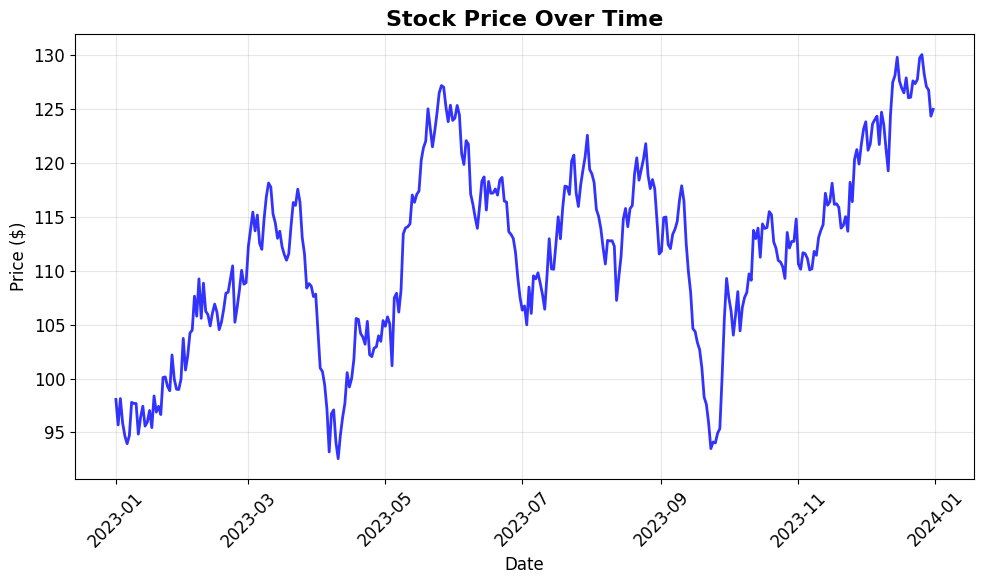

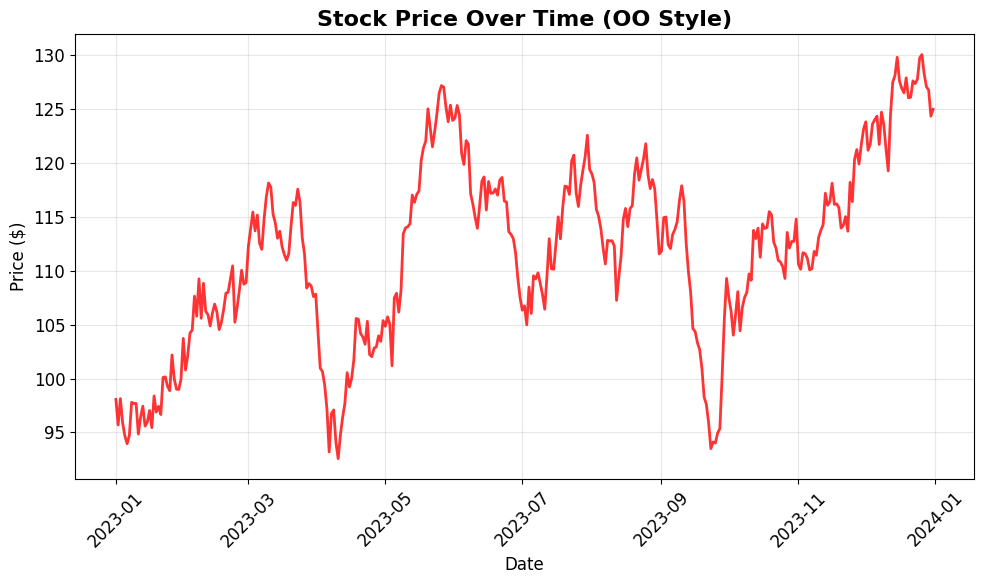

In [11]:
# Example 1: Simple line plot using pyplot interface
plt.figure(figsize=(10, 6))
plt.plot(stock_df['date'], stock_df['price'], linewidth=2, color='blue', alpha=0.8)
plt.title('Stock Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example 2: Object-oriented approach (recommended for complex plots)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(stock_df['date'], stock_df['price'], linewidth=2, color='red', alpha=0.8)
ax.set_title('Stock Price Over Time (OO Style)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


## 2. Scatter Plots
Great for showing relationships between two continuous variables.


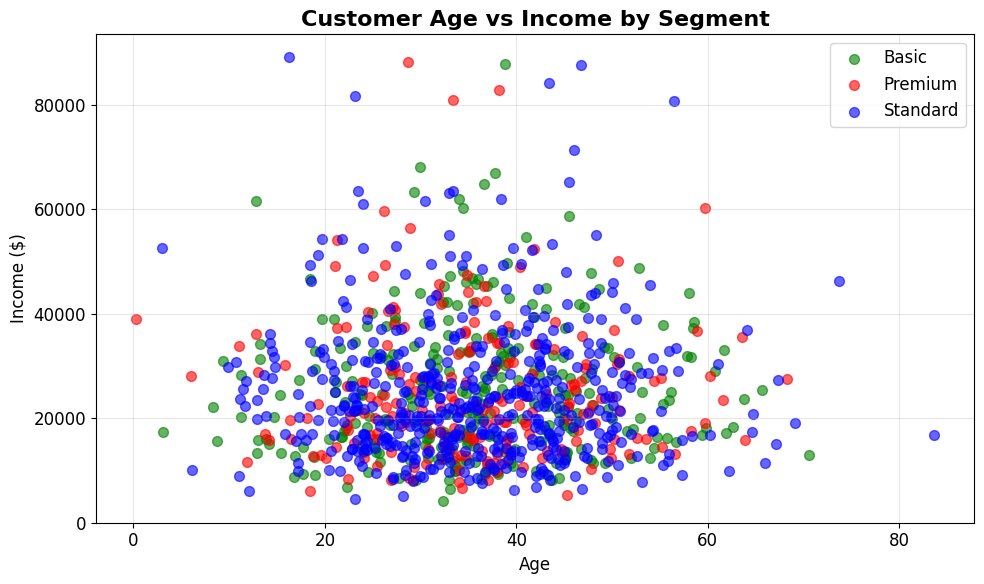

In [12]:
# Scatter plot with customization
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot with different colors for segments
colors = {'Premium': 'red', 'Standard': 'blue', 'Basic': 'green'}
for segment in customer_df['segment'].unique():
    data = customer_df[customer_df['segment'] == segment]
    ax.scatter(data['age'], data['income'], 
               c=colors[segment], label=segment, alpha=0.6, s=50)

ax.set_title('Customer Age vs Income by Segment', fontsize=16, fontweight='bold')
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Income ($)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Bar Charts
Ideal for categorical data and comparisons.


In [32]:
(sales_df.groupby('category')['sales'].sum().sort_values(ascending=False))

category
Electronics      419007.592552
Sports           418154.467640
Home & Garden    415645.050605
Clothing         415619.601758
Books            414567.420177
Name: sales, dtype: float64

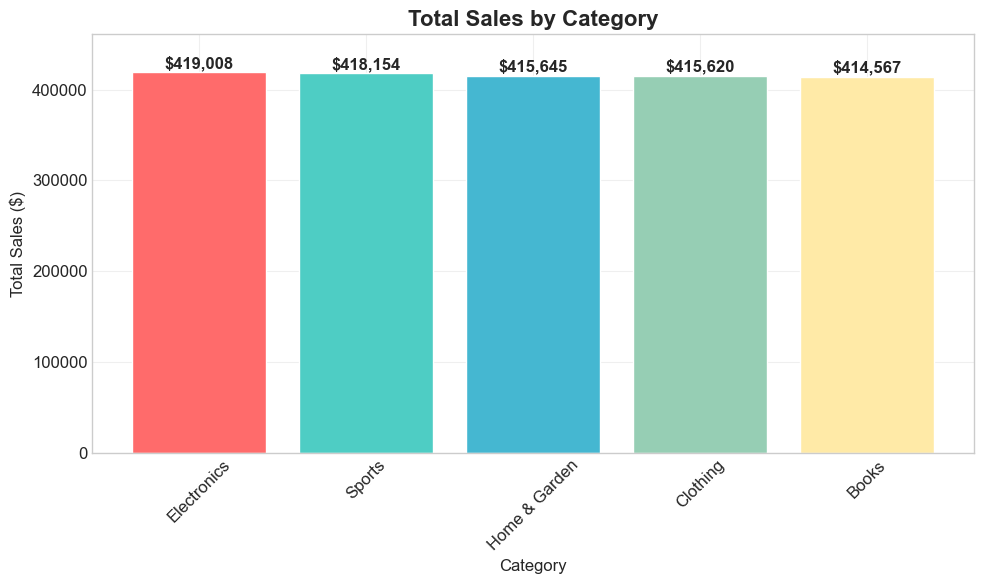

In [35]:
# Bar chart showing sales by category
category_sales = sales_df.groupby('category')['sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(category_sales.index, category_sales.values, 
              color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

ax.set_title('Total Sales by Category', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Total Sales ($)', fontsize=12)
ax.set_ylim(0, max(category_sales.values) * 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Customization & Styling

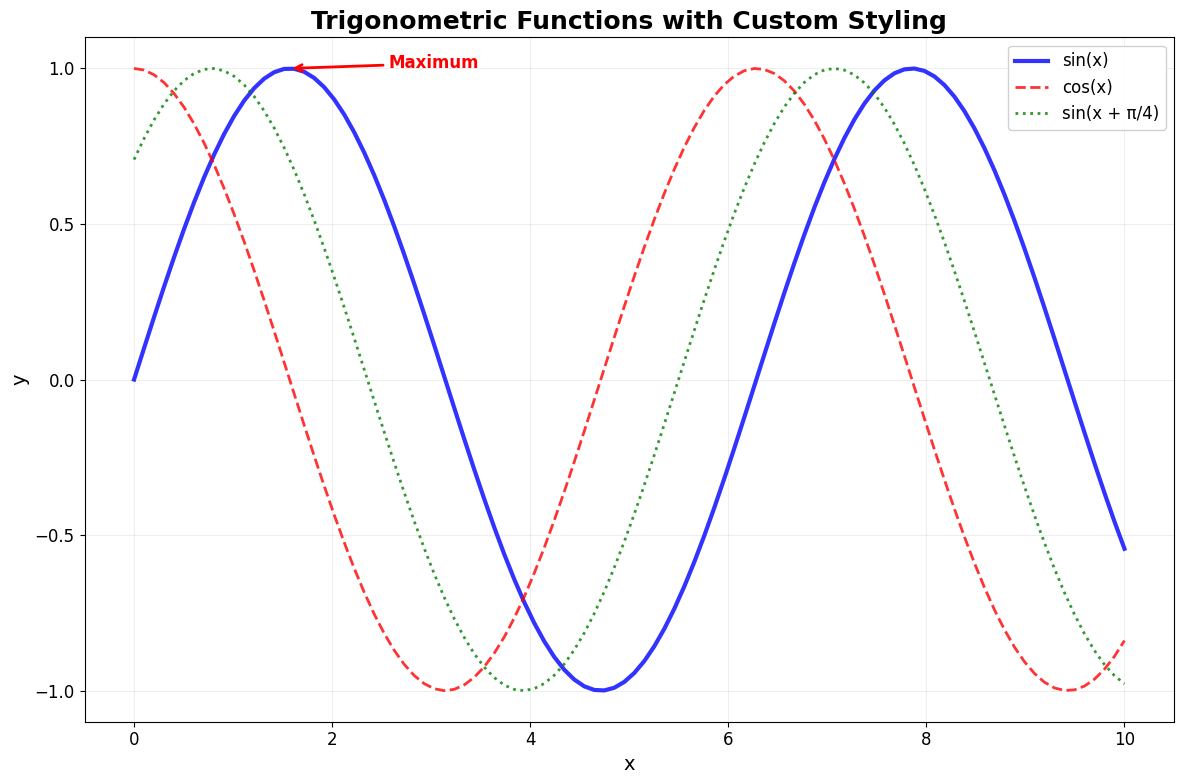

In [14]:
# Advanced customization example
fig, ax = plt.subplots(figsize=(12, 8))

# Create multiple lines with different styles
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x + np.pi/4)

# Plot with different styles
ax.plot(x, y1, 'b-', linewidth=3, label='sin(x)', alpha=0.8)
ax.plot(x, y2, 'r--', linewidth=2, label='cos(x)', alpha=0.8)
ax.plot(x, y3, 'g:', linewidth=2, label='sin(x + π/4)', alpha=0.8)

# Customize the plot
ax.set_title('Trigonometric Functions with Custom Styling', fontsize=18, fontweight='bold')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend(fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Customize ticks
ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(-1, 1.5, 0.5))

# Add annotations
ax.annotate('Maximum', xy=(np.pi/2, 1.0), xytext=(np.pi/2 + 1, 1.0),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()


#  Advanced Features


## Subplots and Multiple Axes
Creating complex layouts with multiple plots.

In [36]:
sales_df.head()

,date,category,sales,region
0,2023-01-01,Electronics,1085.516400,East
1,2023-01-01,Clothing,1231.617179,South
2,2023-01-01,Books,1156.859787,West
3,2023-01-01,Home & Garden,919.892723,West
4,2023-01-01,Sports,960.361127,West


In [15]:
monthly_sales = sales_df.groupby([sales_df['date'].dt.to_period('M'), 'category'])['sales'].sum()
monthly_sales.head(10)

date     category     
2023-01  Books            33302.414683
         Clothing         28829.319536
         Electronics      32095.750739
         Home & Garden    30161.386724
         Sports           28858.976958
2023-02  Books            25064.727111
         Clothing         26686.659934
         Electronics      30011.518823
         Home & Garden    29462.520552
         Sports           28231.199981
Name: sales, dtype: float64

In [16]:
monthly_sales = monthly_sales.unstack()
monthly_sales.head()

category,Books,Clothing,Electronics,Home & Garden,Sports
date,,,,,
2023-01,33302.414683,28829.319536,32095.750739,30161.386724,28858.976958
2023-02,25064.727111,26686.659934,30011.518823,29462.520552,28231.199981
2023-03,31204.424624,31454.158493,31455.673890,30244.294744,31954.264463
2023-04,29177.462992,30047.250725,28116.532432,30909.820845,29293.939931
2023-05,31604.264398,31373.650798,30721.217531,30852.930686,30825.628634


In [17]:
regional_sales = sales_df.groupby('region')['sales'].sum()
regional_sales

region
East     511310.503382
North    529255.761965
South    516016.997767
West     526410.869618
Name: sales, dtype: float64

In [18]:
sales_by_category = [sales_df[sales_df['category'] == cat]['sales'].values 
                    for cat in sales_df['category'].unique()]
np.array(sales_by_category).shape

(5, 365)

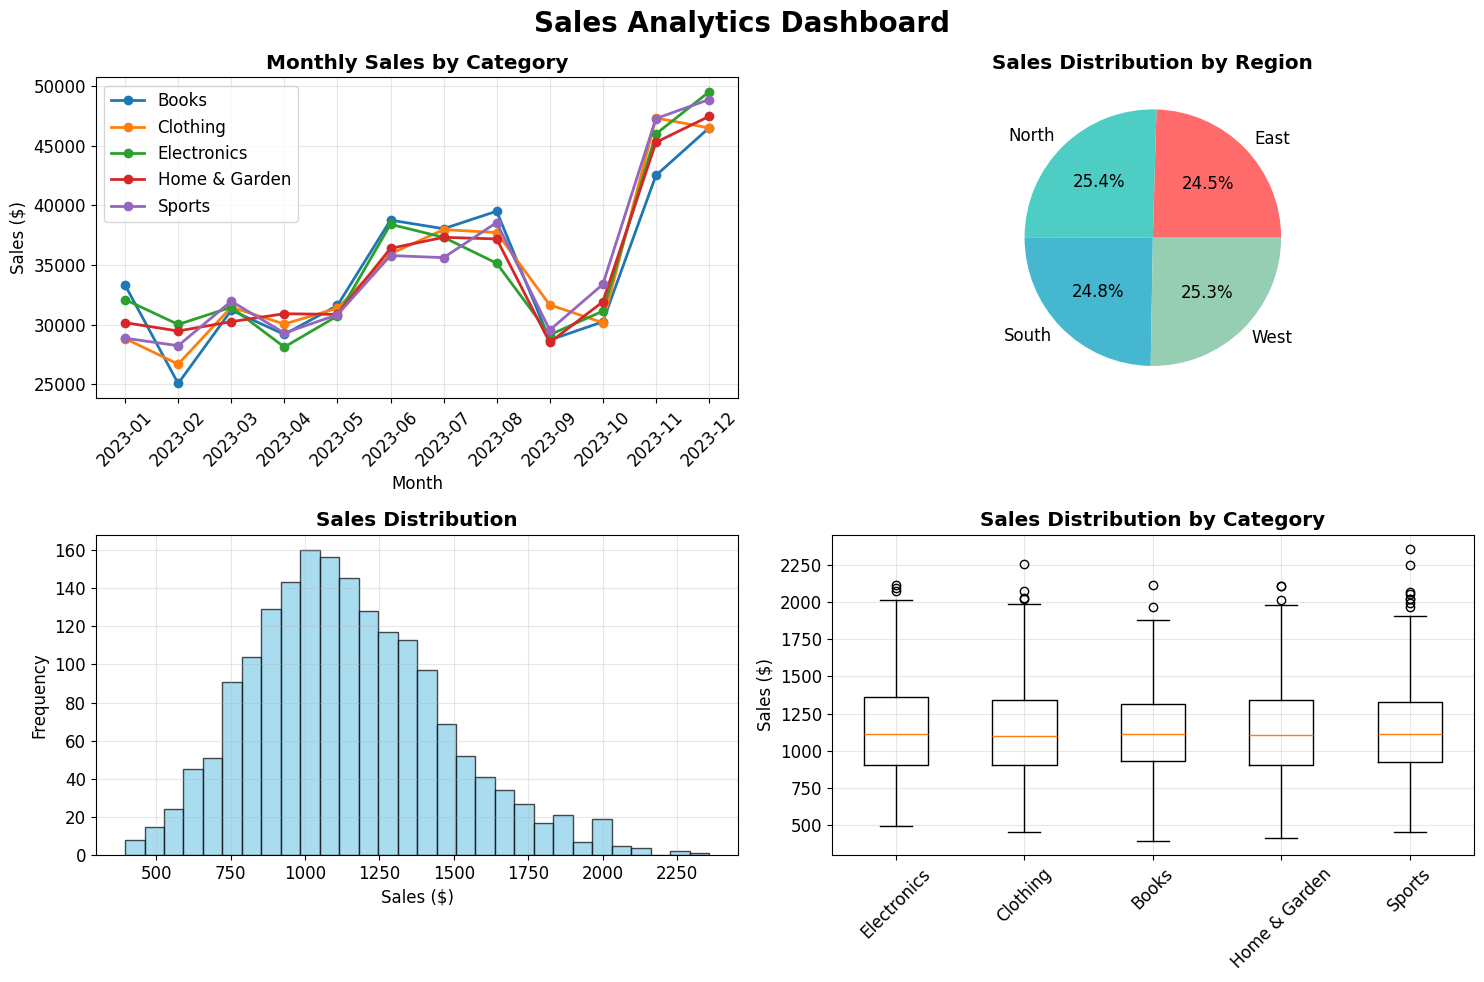

In [ ]:
# Create a dashboard with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sales Analytics Dashboard', fontsize=20, fontweight='bold')


# 1. Sales over time by category
for category in monthly_sales.columns:
    axes[0, 0].plot(monthly_sales.index.astype(str), monthly_sales[category], 
                    marker='o', linewidth=2, label=category)
axes[0, 0].set_title('Monthly Sales by Category', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Regional sales distribution
axes[0, 1].pie(regional_sales.values, labels=regional_sales.index, autopct='%1.1f%%',
               colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 1].set_title('Sales Distribution by Region', fontweight='bold')

# 3. Sales histogram
axes[1, 0].hist(sales_df['sales'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Sales Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Sales ($)')
axes[1, 0].set_ylabel('Frequency')

# 4. Box plot by category
axes[1, 1].boxplot(sales_by_category, labels=sales_df['category'].unique())
axes[1, 1].set_title('Sales Distribution by Category', fontweight='bold')
axes[1, 1].set_ylabel('Sales ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Introduction to Seaborn


## What is Seaborn?
Seaborn is a statistical data visualization library built on top of Matplotlib. It provides:
- Beautiful default styles
- Statistical plotting functions
- Easy integration with pandas DataFrames
- Built-in color palettes

## Key Advantages:
- **Statistical Focus**: Designed for statistical analysis
- **Beautiful Defaults**: Attractive plots out of the box
- **Pandas Integration**: Works seamlessly with DataFrames
- **Less Code**: More concise than Matplotlib for statistical plots

In [37]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

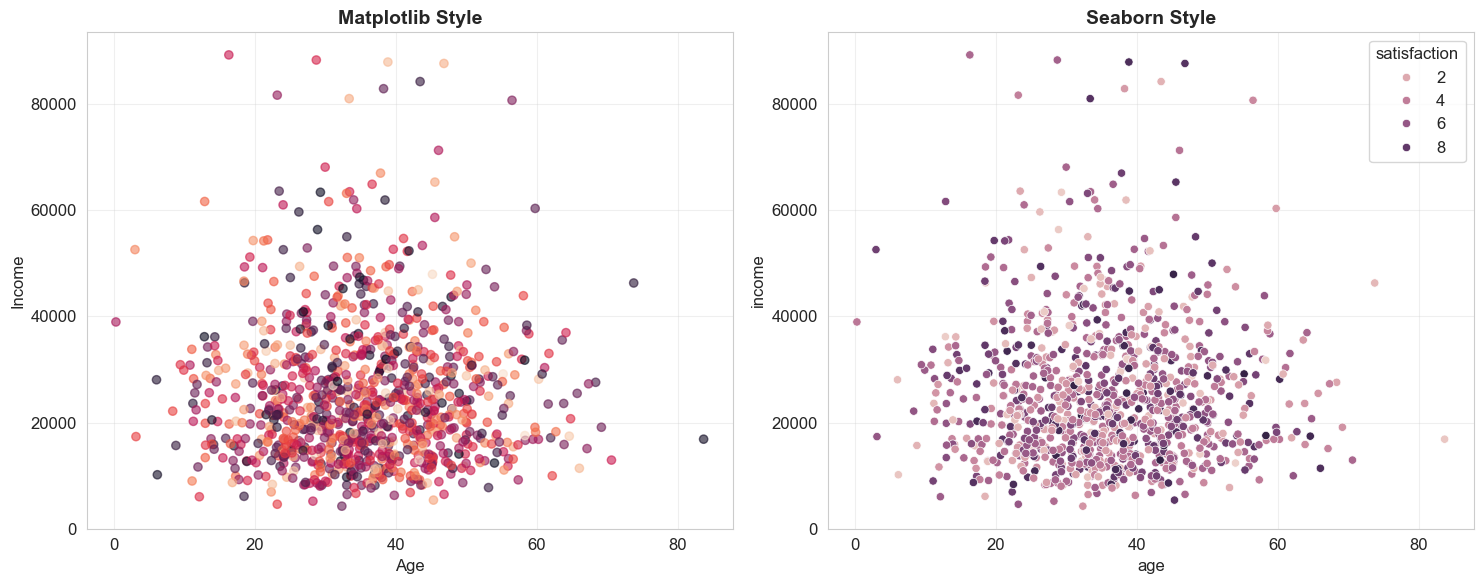

In [21]:

# Seaborn style comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matplotlib style
axes[0].scatter(customer_df['age'], customer_df['income'], 
                c=customer_df['satisfaction'], alpha=0.6)
axes[0].set_title('Matplotlib Style', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income')

# Seaborn style
sns.scatterplot(data=customer_df, x='age', y='income', hue='satisfaction', ax=axes[1])
axes[1].set_title('Seaborn Style', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# Statistical Plots


## Distribution Plots
Understanding data distributions is crucial for analysis.

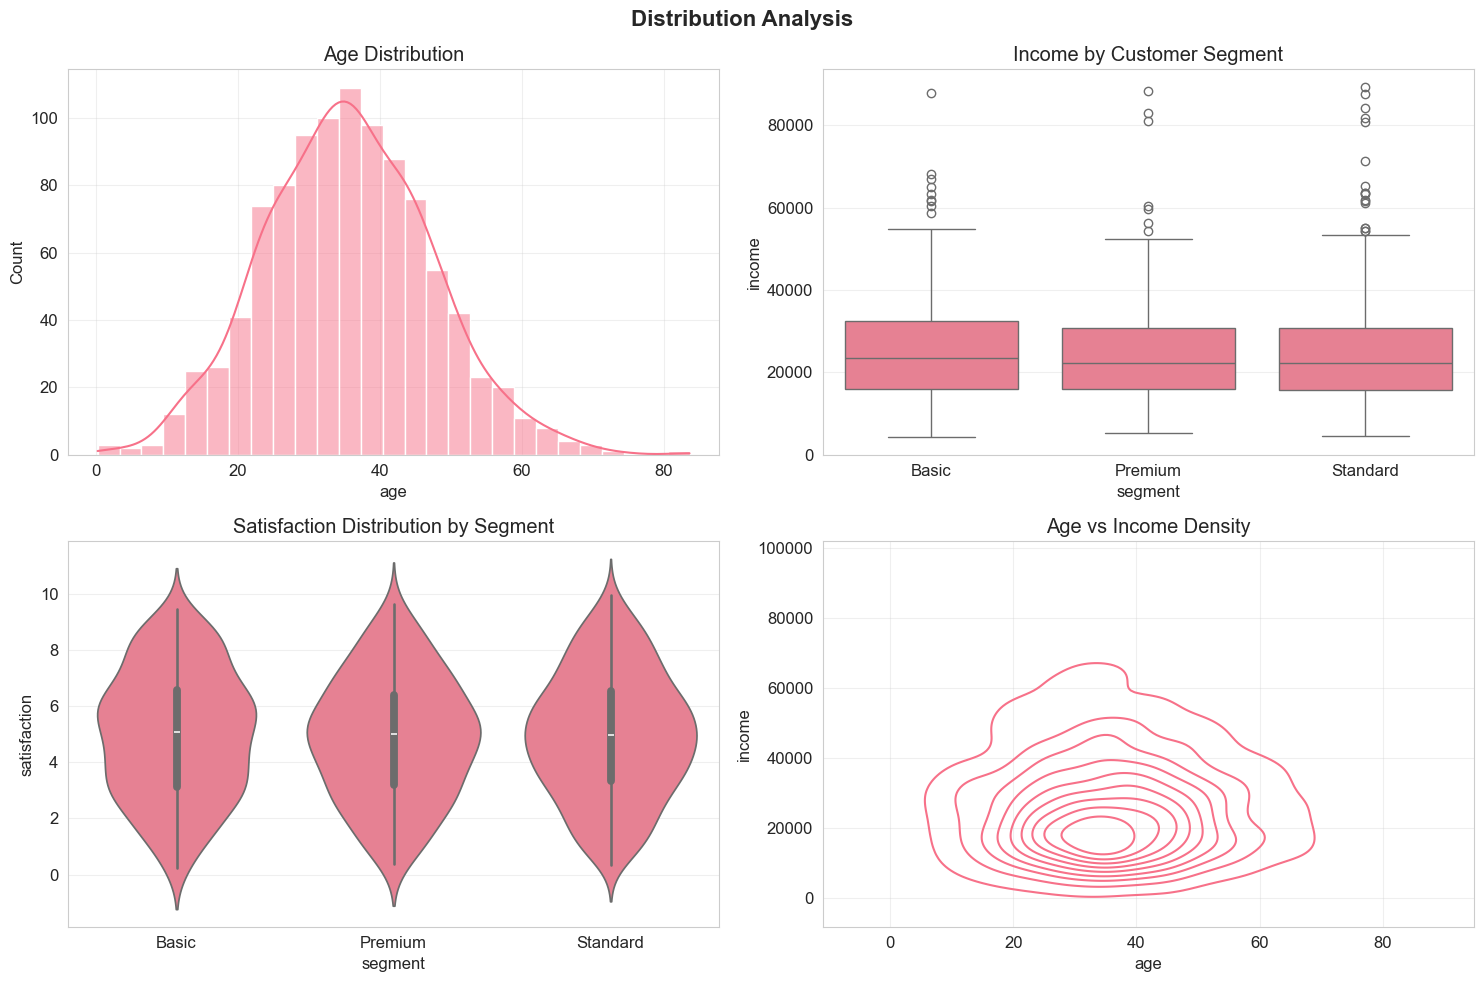

In [22]:
# Distribution plots with Seaborn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Histogram with KDE
sns.histplot(data=customer_df, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. Box plot
sns.boxplot(data=customer_df, x='segment', y='income', ax=axes[0, 1])
axes[0, 1].set_title('Income by Customer Segment')

# 3. Violin plot (shows distribution shape)
sns.violinplot(data=customer_df, x='segment', y='satisfaction', ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction Distribution by Segment')

# 4. KDE plot for multiple variables
sns.kdeplot(data=customer_df, x='age', y='income', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Income Density')

plt.tight_layout()
plt.show()


## Relationship Plots
Exploring correlations and relationships between variables.


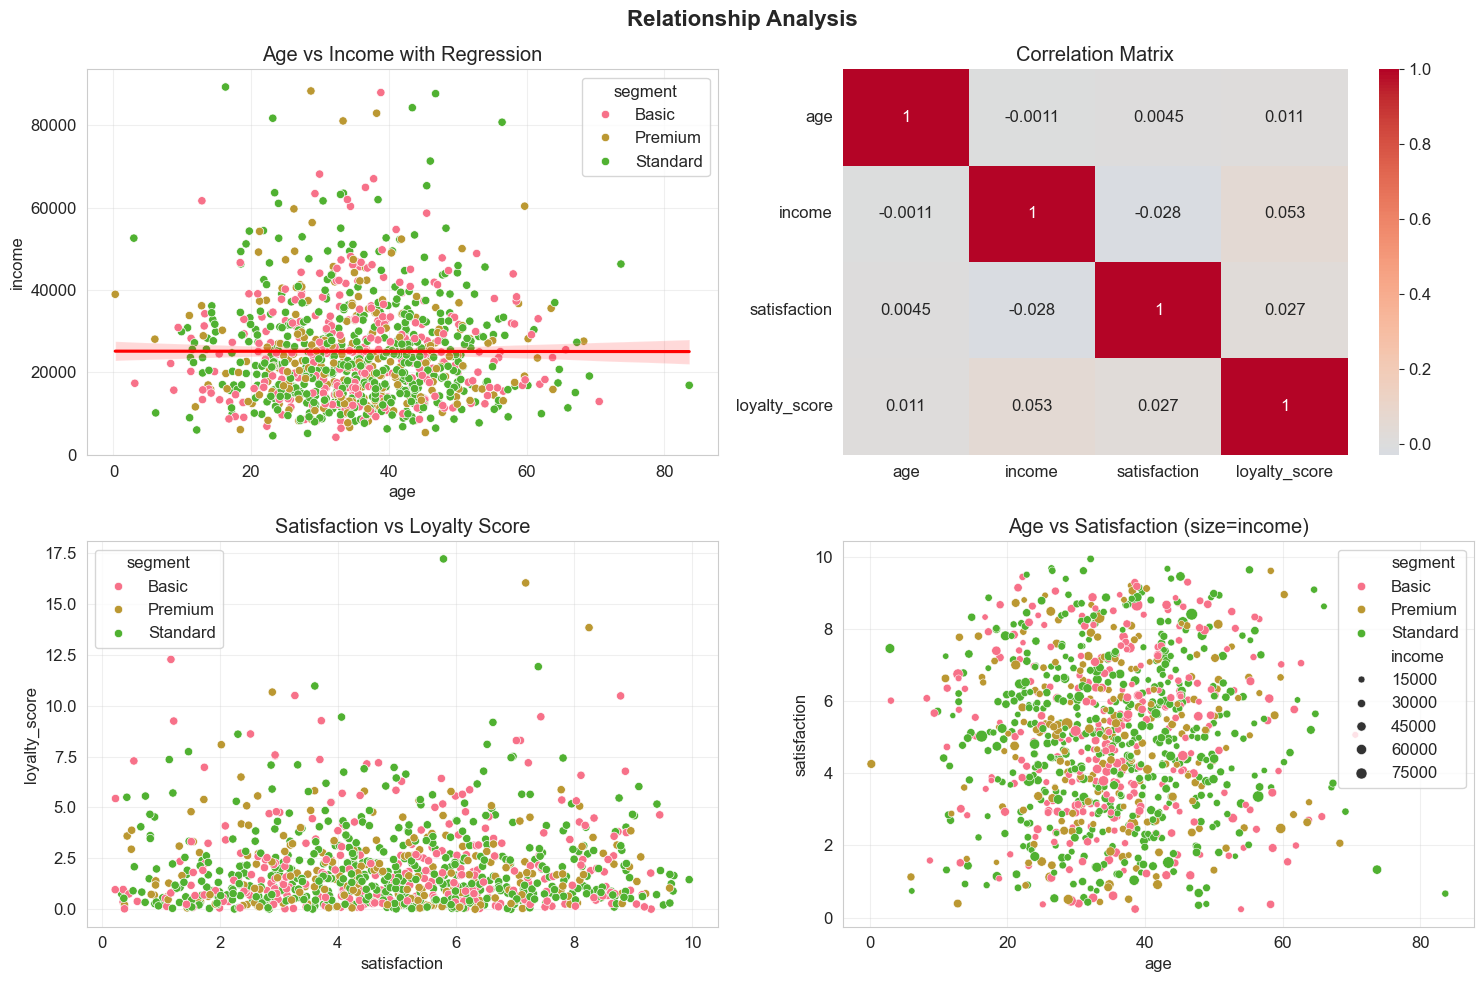

In [23]:
# Relationship plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relationship Analysis', fontsize=16, fontweight='bold')

# 1. Scatter plot with regression line
sns.scatterplot(data=customer_df, x='age', y='income', hue='segment', ax=axes[0, 0])
sns.regplot(data=customer_df, x='age', y='income', ax=axes[0, 0], scatter=False, color='red')
axes[0, 0].set_title('Age vs Income with Regression')

# 2. Correlation heatmap
correlation_data = customer_df[['age', 'income', 'satisfaction', 'loyalty_score']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix')

# 3. Pair plot (subset)
sns.scatterplot(data=customer_df, x='satisfaction', y='loyalty_score', hue='segment', ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction vs Loyalty Score')

# 4. Joint plot style
sns.scatterplot(data=customer_df, x='age', y='satisfaction', size='income', hue='segment', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Satisfaction (size=income)')

plt.tight_layout()
plt.show()


# Advanced Customization


## Combining Matplotlib and Seaborn
The best of both worlds - use Seaborn for statistical plots and Matplotlib for fine-tuning.

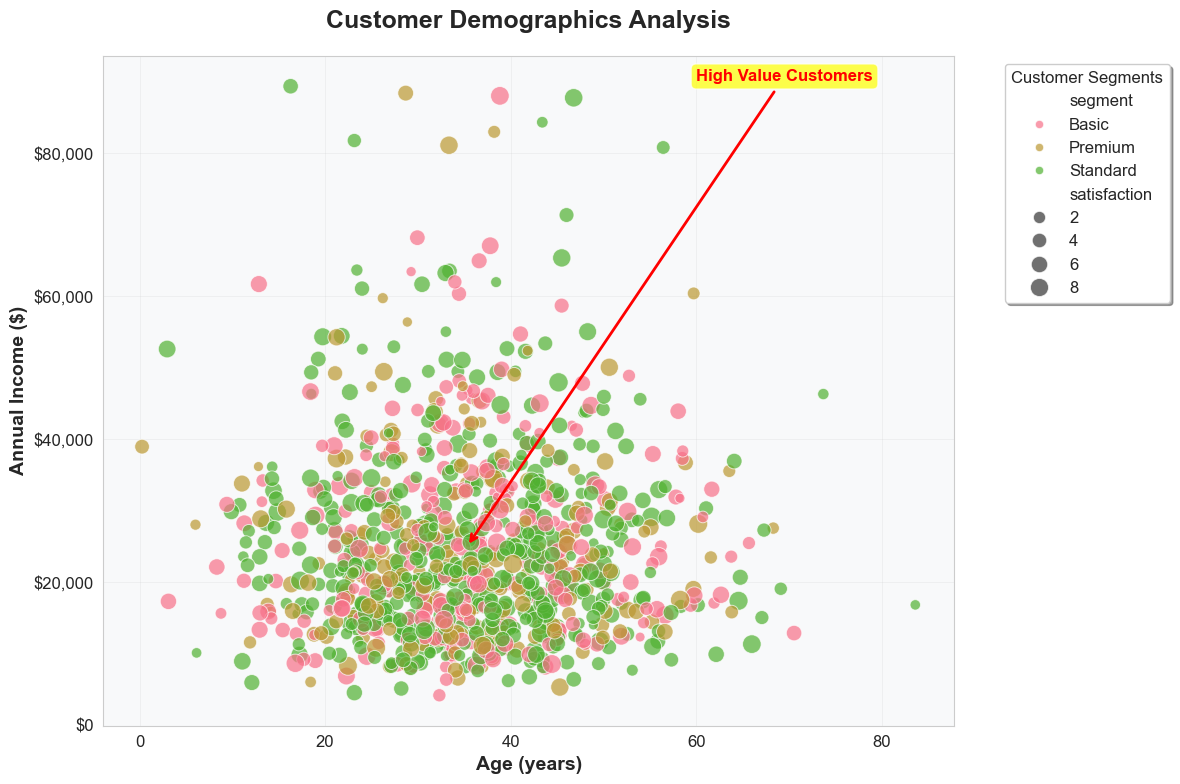

In [24]:
# Advanced customization combining both libraries
fig, ax = plt.subplots(figsize=(12, 8))

# Use Seaborn for the statistical plot
sns.scatterplot(data=customer_df, x='age', y='income', hue='segment', 
                size='satisfaction', sizes=(50, 200), alpha=0.7, ax=ax)

# Use Matplotlib for advanced customization
ax.set_title('Customer Demographics Analysis', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age (years)', fontsize=14, fontweight='bold')
ax.set_ylabel('Annual Income ($)', fontsize=14, fontweight='bold')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Customer Segments', 
          bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fancybox=True, shadow=True)

# Add custom annotations
ax.annotate('High Value Customers', 
            xy=(customer_df[customer_df['segment'] == 'Premium']['age'].mean(), 
                customer_df[customer_df['segment'] == 'Premium']['income'].mean()),
            xytext=(60, 90000),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Customize grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_facecolor('#f8f9fa')

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


# Best Practices

## Design Principles for Effective Visualizations

### 1. Color Theory and Accessibility
- Use colorblind-friendly palettes
- Maintain sufficient contrast
- Use color purposefully, not decoratively

### 2. Typography and Layout
- Choose readable fonts
- Use consistent sizing
- Maintain proper spacing

### 3. Data Integrity
- Start axes at zero when appropriate
- Don't mislead with scaling
- Include context and annotations


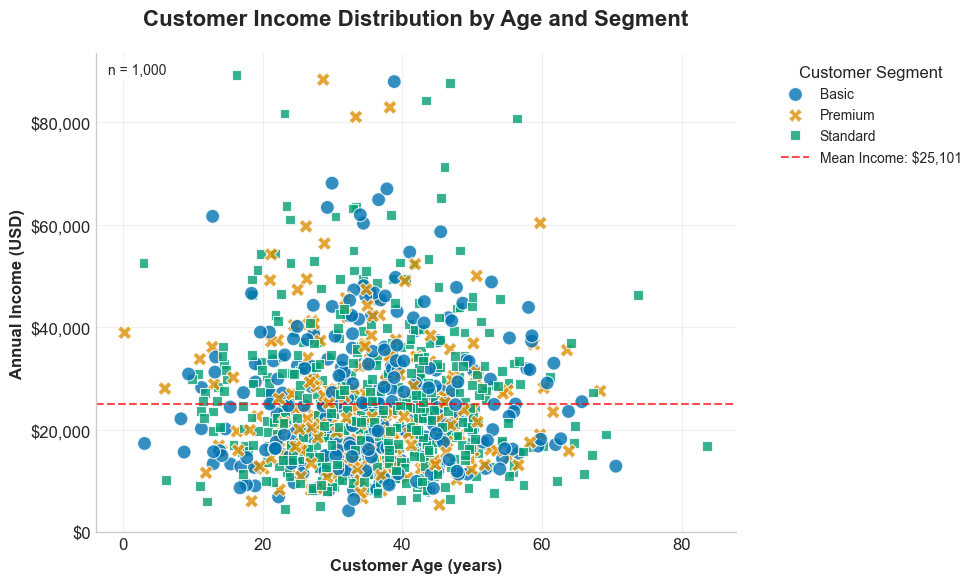

In [25]:
# Set style for professional appearance
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot with proper styling
sns.scatterplot(data=customer_df, x='age', y='income', hue='segment', 
                style='segment', s=100, alpha=0.8, ax=ax)

# Professional styling
ax.set_title('Customer Income Distribution by Age and Segment', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Customer Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Annual Income (USD)', fontsize=12, fontweight='bold')

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add statistical information
mean_income = customer_df['income'].mean()
ax.axhline(y=mean_income, color='red', linestyle='--', alpha=0.7, 
           label=f'Mean Income: ${mean_income:,.0f}')

# Customize legend
ax.legend(title='Customer Segment', title_fontsize=12, fontsize=10,
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Add sample size annotation
n_samples = len(customer_df)
ax.text(0.02, 0.98, f'n = {n_samples:,}', transform=ax.transAxes, 
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Matplotlib vs Seaborn - When to Use What?

| **Use Matplotlib for:** | **Use Seaborn for:** |
|------------------------|---------------------|
| Custom plots and fine control | Statistical plots |
| Complex layouts and subplots | Quick exploratory analysis |
| Publication-quality figures | Beautiful default styling |
| Performance-critical applications | Categorical data analysis |
| When you need pixel-perfect control | Correlation and distribution analysis |


# Assignments

## Assignment 1: Create a Multi-Panel Dashboard
**Objective**: Create a comprehensive dashboard showing sales analytics.

**Requirements**:
- 4 subplots in a 2x2 grid
- Include: sales over time, category distribution, regional comparison, and top performing products
- Use both Matplotlib and Seaborn
- Add proper titles, labels, and formatting

## Assignment 2: Statistical Analysis Visualization
**Objective**: Create a comprehensive statistical analysis of customer data.

**Requirements**:
- 9 subplots in a 3x3 grid
- Show distribution of key metrics
- Include correlation analysis
- Add statistical annotations (mean, median, etc.)
- Use appropriate color schemes


## Assignment 3: Time Series Analysis
**Objective**: Create a comprehensive time series analysis of stock prices.

**Requirements**:
- 3 subplots in a 3x1 grid
- Show price trends over time
- Include volume analysis
- Add moving averages
- Highlight significant events


**NOTE: Use the best practices as much as you can and mention how you have used it.(Extra Points for it)**

### **Submission Guidelines**: 
Requirements:
- A Colab Notebook with code for all three assignments
- Saved visualizations for each assignment (.pdf format)

**Note: All the assigment submissions will be considered for the final certification.**

## Next Steps

### **Immediate Actions**
- Complete the Assignments
- Try creating your own visualizations
- Experiment with different plot types
- Practice with your own datasets

### **Advanced Topics to Explore**
- Interactive plotting with Plotly
- Dashboard creation with Streamlit
- 3D visualizations
- Animation and dynamic plots
- Custom color palettes and themes

### **Resources for Continued Learning**
- [Matplotlib](https://matplotlib.org/stable/tutorials/index.html)
- [Seaborn](https://seaborn.pydata.org/tutorial.html)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)

---
